## Connecttel Customer Churn Predictive and Precriptive Analysis

In this data-driven journey, we address a critical challenge faced by Connecttel, a leading telecommunications company: customer churn. My mission is to harness the power of advanced analytics and machine learning to build a robust churn prediction system. By doing so, we will empower ConnectTel to proactively retain customers, foster loyalty, and stay ahead in the fiercely competitive telecom landscape. Join us as we dive into the world of supervised machine learning algorithms to help ConnectTel secure its future in the digital age.

In [1]:
# import libraries
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# classifier Library (Algorithms)
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# evaluation metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

<span style="color:red">
    <h3>Limitations in the Dataset</h3>
    The dataset used as the case study presents certain limitations that need to be considered when interpreting the results and drawing conclusions. While the data dictionary provides valuable information about the variables but lacks their definitions, it lacks essential details related to the domain knowledge of the company or industry under investigation.
Conclusively, without a comprehensive understanding of the specific context in which the data was collected, some important aspects remain obscured. For instance, the dataset did not capture all relevant factors that impact the industry's performance, potentially leading to biased or incomplete analyses.</span>

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

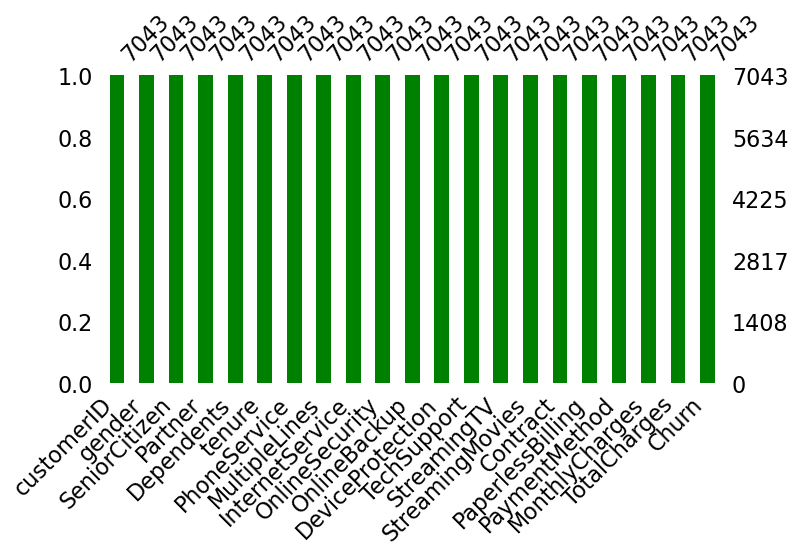

In [8]:
msno.bar(df, color="green", figsize=(8,4));

### Exploratory Analysis

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


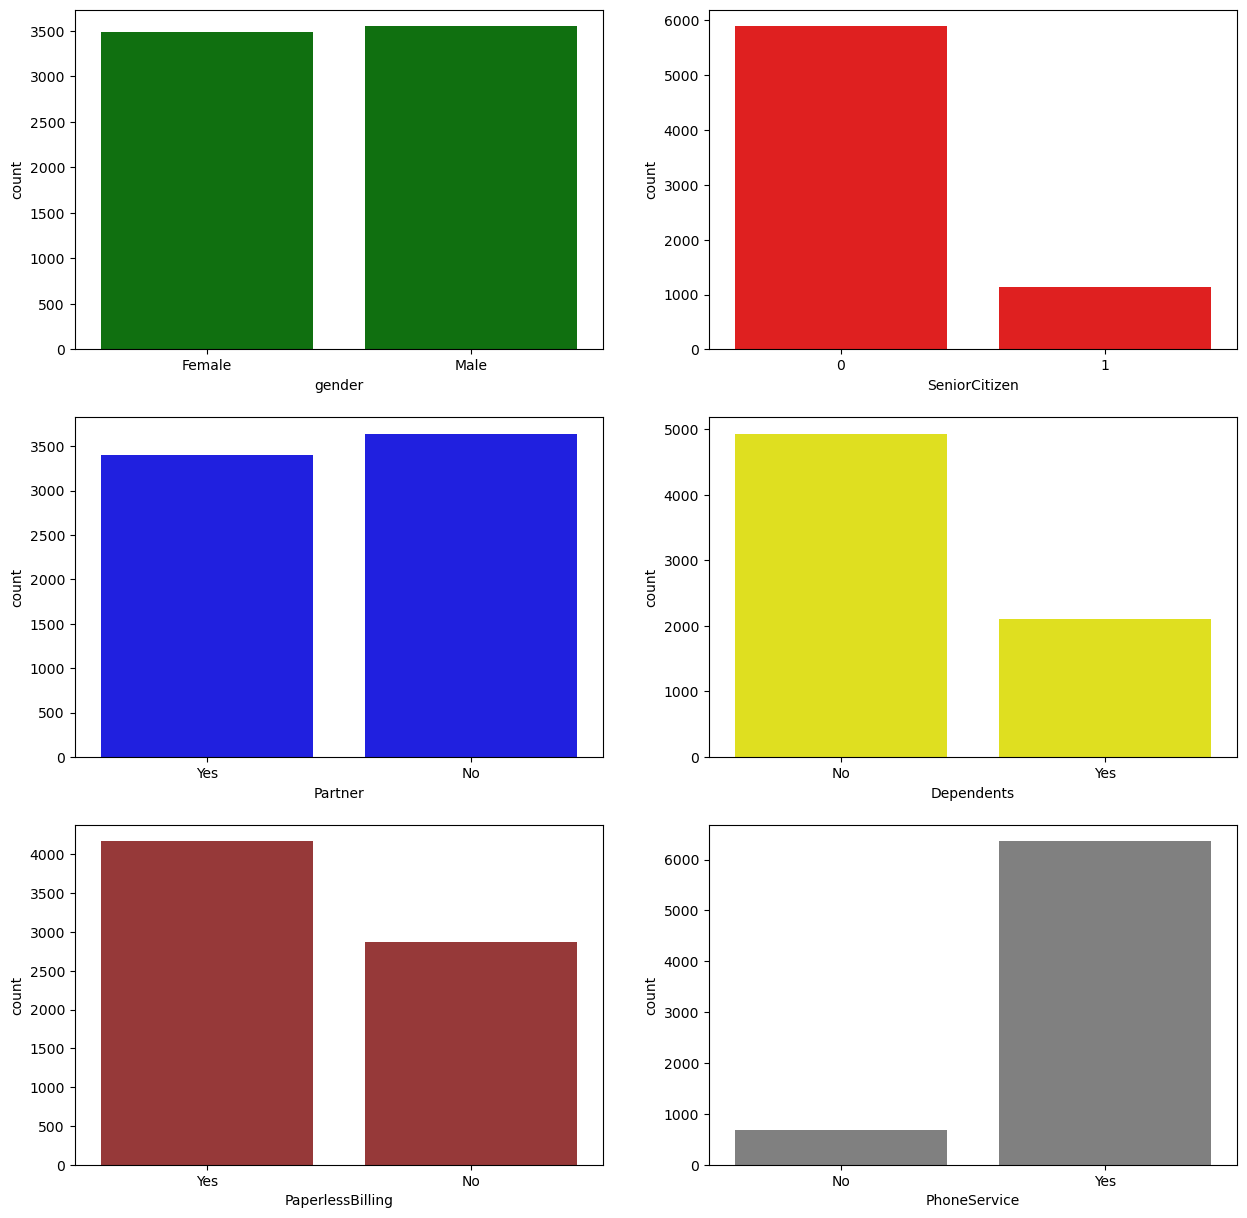

In [12]:
fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(15,15))
sns.countplot(x=df["gender"],color="green", ax=axs[0,0])
#axs[0,0].set_title("ST depression induced by exercise relative to rest (oldpeak)")

sns.countplot(x=df["SeniorCitizen"],color="red", ax=axs[0,1])
#axs[0,1].set_title("resting blood pressure (trestbps)")

sns.countplot(x=df["Partner"],color="blue", ax=axs[1,0])
#axs[1,0].set_title("serum cholesterol (chol)")

sns.countplot(x=df["Dependents"],color="yellow", ax=axs[1,1])
#axs[1,1].set_title("maximum heart rate achieved (thalach)")

sns.countplot(x=df["PaperlessBilling"],color="brown", ax=axs[2,0])
#axs[2,0].set_title("thalassemia (thal) (3=normal, 6=fixed, 7=revercible defeat)")

sns.countplot(x=df["PhoneService"],color="grey", ax=axs[2,1]);
#axs[2,1].set_title("number of major vessels colored by flourosopy (ca)")

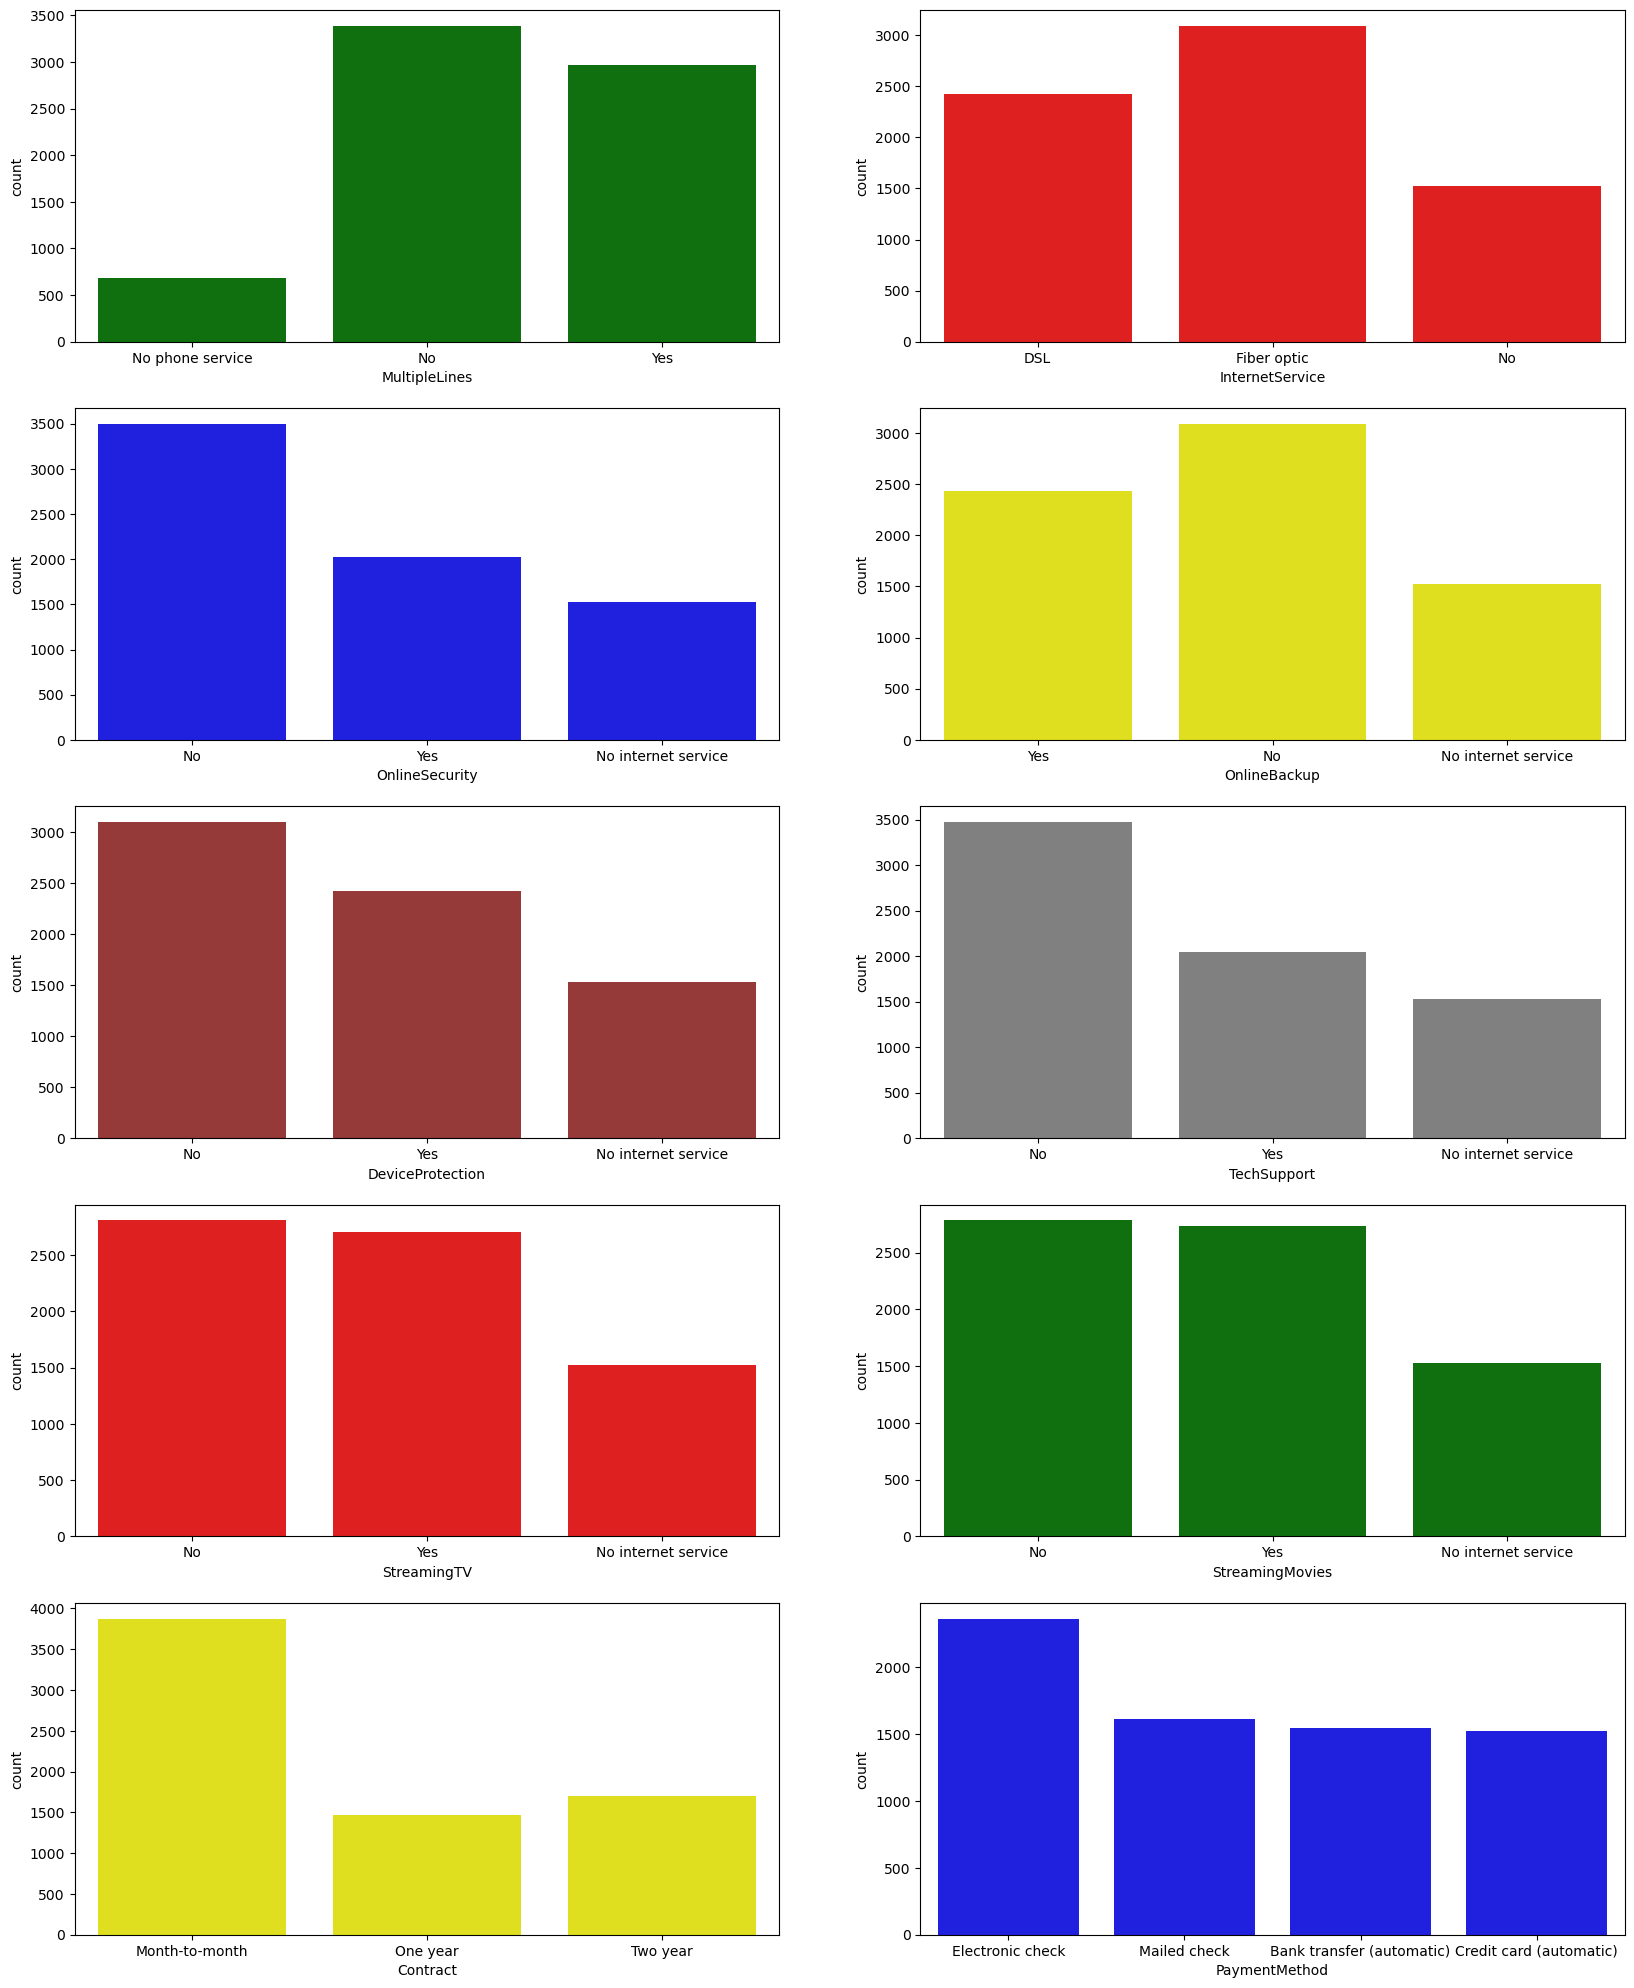

In [13]:
fig, axs=plt.subplots(nrows=5, ncols=2, figsize=(20,25))
sns.countplot(x=df["MultipleLines"],color="green", ax=axs[0,0])
#axs[0,0].set_title("ST depression induced by exercise relative to rest (oldpeak)")

sns.countplot(x=df["InternetService"],color="red", ax=axs[0,1])
#axs[0,1].set_title("resting blood pressure (trestbps)")

sns.countplot(x=df["OnlineSecurity"],color="blue", ax=axs[1,0])
#axs[1,0].set_title("serum cholesterol (chol)")

sns.countplot(x=df["OnlineBackup"],color="yellow", ax=axs[1,1])
#axs[1,1].set_title("maximum heart rate achieved (thalach)")

sns.countplot(x=df["DeviceProtection"],color="brown", ax=axs[2,0])
#axs[2,0].set_title("thalassemia (thal) (3=normal, 6=fixed, 7=revercible defeat)")

sns.countplot(x=df["TechSupport"],color="grey", ax=axs[2,1])
#axs[2,1].set_title("number of major vessels colored by flourosopy (ca)")

sns.countplot(x=df["StreamingTV"],color="red", ax=axs[3,0])
#axs[2,0].set_title("thalassemia (thal) (3=normal, 6=fixed, 7=revercible defeat)")

sns.countplot(x=df["StreamingMovies"],color="green", ax=axs[3,1])
#axs[2,1].set_title("number of major vessels colored by flourosopy (ca)")

sns.countplot(x=df["Contract"],color="yellow", ax=axs[4,0])
#axs[2,0].set_title("thalassemia (thal) (3=normal, 6=fixed, 7=revercible defeat)")

sns.countplot(x=df["PaymentMethod"],color="blue", ax=axs[4,1]);
#axs[2,1].set_title("number of major vessels colored by flourosopy (ca)")


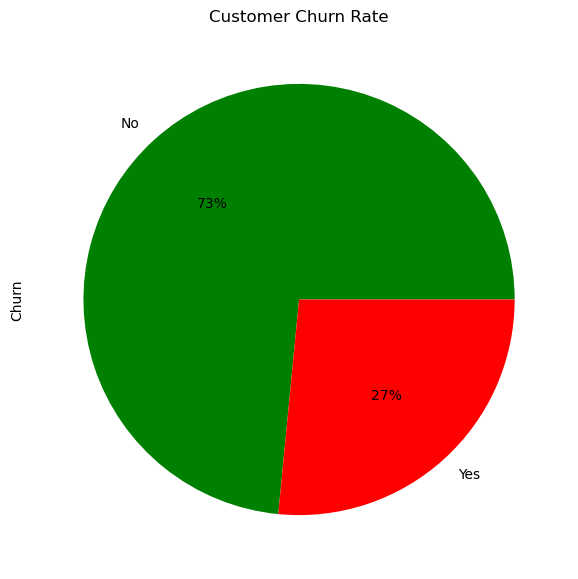

In [14]:
df["Churn"].value_counts().plot(kind="pie", autopct="%1.0f%%", figsize=(7,7), colors=["green","red"], title= "Customer Churn Rate");

### Data Preprocessing

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [17]:
df.drop(["customerID","tenure"], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


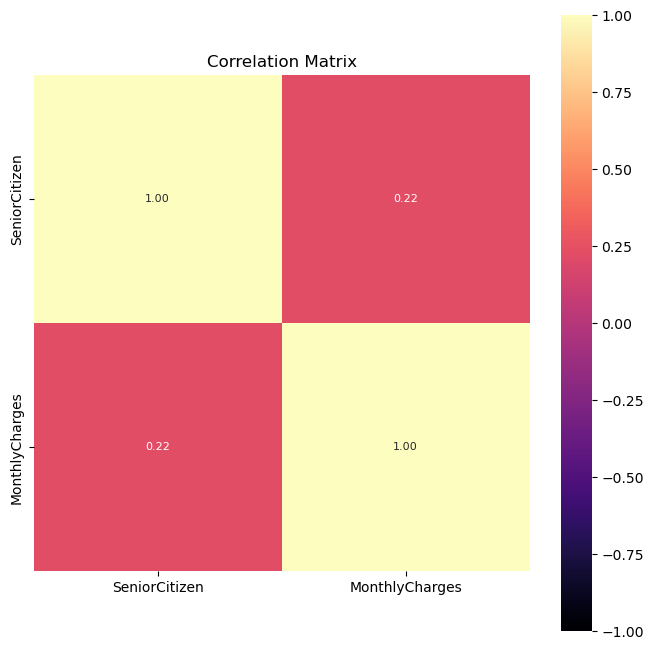

In [18]:
plt.figure(figsize=(8,8))
hm=sns.heatmap(df.corr(), cbar=True,cmap="magma", vmax=1, vmin=-1, annot=True, square=True, fmt=".2f", annot_kws={"size": 8})
hm.set_title("Correlation Matrix");

### Feature Engineering / Data Preprocessing

### Normalization

In [19]:
#label encoding (will make the categorical data a numerical dtype, int/float)
# method to use if the dataset contains object data type
#looping through the data to Normalize and Standardize
encoder= LabelEncoder()
for c in df.columns[0:]:
    if(df[c].dtype=="object"):
        df[c]= encoder.fit_transform(df[c])
    else:
        df[c]=df[c]
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [20]:
df1= df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
results= df[['Churn']]

In [21]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [22]:
results.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [23]:
df1.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
dtype: object

In [24]:
#scaler= MinMaxScaler()

#df1["Scaled_MonthlyCharges"]= scaler.fit_transform(df1["MonthlyCharges"].values.reshape(-1,1))
#df1["Scaled_TotalCharges"]= scaler.fit_transform(df1["TotalCharges"].values.reshape(-1,1))

#df1.drop(["MonthlyCharges","TotalCharges"], axis=1, inplace=True)

#df1.head()

### Machine Learning

In [25]:
# split dataset into training and test set X= Question y= Answer
X_train, X_test, y_train, y_test= train_test_split(df1,results,test_size=0.2,random_state=42)

In [26]:
X_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,1,0,0,2,0,2,0,0,2,1,0,3,64.85,610
1623,0,0,0,0,1,2,1,0,2,0,0,2,2,2,1,0,97.20,4319
6074,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,23.45,1940
1362,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.20,2012
6754,1,0,0,1,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,0,1,2,0,0,0,2,2,0,1,2,95.00,6440
5191,0,0,1,1,1,2,0,2,2,2,2,2,2,2,1,1,91.10,1819
5226,1,0,1,1,1,0,2,1,1,1,1,1,1,0,1,2,21.15,2659
5390,1,1,0,0,1,2,1,0,0,2,0,2,2,0,1,2,99.45,370


In [27]:
# model building

# Logistic Regression

logreg= LogisticRegression()

logreg.fit(X_train, y_train)

pred_y= logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, pred_y))
print("Precision:", precision_score(y_test, pred_y))
print("Recall:", recall_score(y_test, pred_y))
print("f1_score:", f1_score(y_test, pred_y))
print("AUC ROC:", roc_auc_score(y_test, pred_y))

Logistic Regression
Accuracy: 0.7991483321504613
Precision: 0.6271186440677966
Recall: 0.5951742627345844
f1_score: 0.6107290233837688
AUC ROC: 0.7338805676607285


In [28]:
pred_y

array([1, 0, 0, ..., 0, 0, 0])

In [29]:
y_test

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6366,0
315,0
2439,0
5002,0


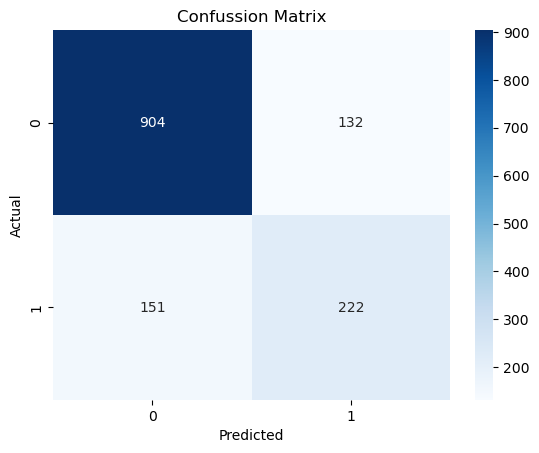

In [30]:
# create a logistic confusion matrix

logCM= confusion_matrix(y_test, pred_y)

#visualise LogCM
sns.heatmap(logCM, cmap="Blues", annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confussion Matrix")
plt.show()

In [31]:
# model building
# random forest classifier

rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(rfy_pred, y_test))
print("Precision:", precision_score(rfy_pred, y_test))
print("Recall:", recall_score(rfy_pred, y_test))
print("F1 Score:", f1_score(rfy_pred, y_test))
print("AUC ROC:", roc_auc_score(rfy_pred, y_test))

Random Forest Classifier
Accuracy: 0.7892122072391767
Precision: 0.4879356568364611
Recall: 0.6319444444444444
F1 Score: 0.5506807866868381
AUC ROC: 0.7307804291802954


In [32]:
rfy_pred

array([1, 0, 0, ..., 0, 0, 0])

In [33]:
y_test

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6366,0
315,0
2439,0
5002,0


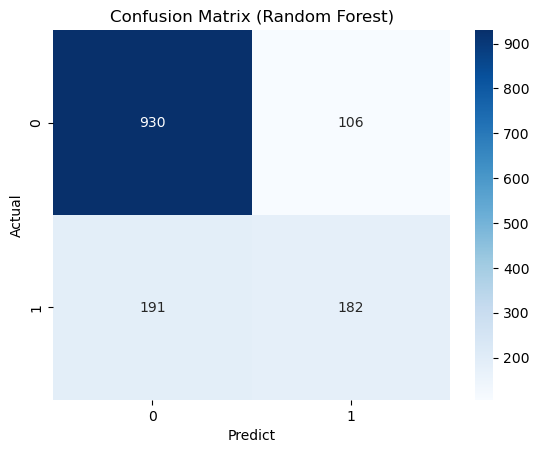

In [34]:
# create a random forest Confusion matrix
RanCM= confusion_matrix(y_test, rfy_pred)

sns.heatmap(RanCM, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)");

In [35]:
# applied different machine learning algorithms

classifier=[[XGBClassifier(),"XGB Classifier"],
           [SGDClassifier(),"SGD Classifier"],
            [LogisticRegression(), "Logistic Regression"],
            [KNeighborsClassifier(),"KNeighbors Classifier"],
           [RandomForestClassifier(),"Random Forest Classifier"],
            [SVC(),"SVC"],
            [GaussianNB(),"Naive Bayes"],
            [DecisionTreeClassifier(),"Decision Tree Classifier"]]

In [36]:
classifier[0]

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'XGB Classifier']

In [37]:
acc_list={}
pre_list={}
recall_list={}
#f1_list={}
roc_list={}

for unique in classifier:
    model= unique[0]
    model.fit(X_train, y_train)
    model_name= unique[1]
    
    pred= model.predict(X_test)
    
    acc_score= accuracy_score(y_test,pred)
    pre_score= precision_score(y_test,pred)
    recal_score= recall_score(y_test,pred)
    #f1_score= f1_score(y_test,pred)
    roc_score= roc_auc_score(y_test,pred)
    
    acc_list[model_name] = ([str(round(acc_score*100,2)) + "%"])
    pre_list[model_name] = ([str(round(pre_score*100,2)) + "%"])
    recall_list[model_name] = ([str(round(recal_score*100,2)) + "%"])
    #f1_list[model_name] = ([str(round(f1_score*100,2)) + "%"])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + "%"])
    
    if model_name != classifier[-1][1]:
        print("")
        

In [38]:
acc_list

{'XGB Classifier': ['78.28%'],
 'SGD Classifier': ['73.81%'],
 'Logistic Regression': ['79.91%'],
 'KNeighbors Classifier': ['75.16%'],
 'Random Forest Classifier': ['79.35%'],
 'SVC': ['73.53%'],
 'Naive Bayes': ['76.22%'],
 'Decision Tree Classifier': ['73.03%']}

In [39]:
pre_list

{'XGB Classifier': ['61.2%'],
 'SGD Classifier': ['59.09%'],
 'Logistic Regression': ['62.71%'],
 'KNeighbors Classifier': ['54.55%'],
 'Random Forest Classifier': ['64.44%'],
 'SVC': ['0.0%'],
 'Naive Bayes': ['53.6%'],
 'Decision Tree Classifier': ['49.09%']}

In [40]:
recall_list

{'XGB Classifier': ['49.06%'],
 'SGD Classifier': ['3.49%'],
 'Logistic Regression': ['59.52%'],
 'KNeighbors Classifier': ['37.0%'],
 'Random Forest Classifier': ['49.06%'],
 'SVC': ['0.0%'],
 'Naive Bayes': ['75.87%'],
 'Decision Tree Classifier': ['50.67%']}

In [41]:
roc_list

{'XGB Classifier': ['68.93%'],
 'SGD Classifier': ['51.31%'],
 'Logistic Regression': ['73.39%'],
 'KNeighbors Classifier': ['62.95%'],
 'Random Forest Classifier': ['69.66%'],
 'SVC': ['50.0%'],
 'Naive Bayes': ['76.11%'],
 'Decision Tree Classifier': ['65.88%']}

In [42]:
print("Accuracy Score")
acc_pd = pd.DataFrame(acc_list)
acc_pd

Accuracy Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,78.28%,73.81%,79.91%,75.16%,79.35%,73.53%,76.22%,73.03%


In [43]:
print("Precision Score")
pre_pd = pd.DataFrame(pre_list)
pre_pd

Precision Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,61.2%,59.09%,62.71%,54.55%,64.44%,0.0%,53.6%,49.09%


In [44]:
print("Recall Score")
recall_pd = pd.DataFrame(recall_list)
recall_pd

Recall Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,49.06%,3.49%,59.52%,37.0%,49.06%,0.0%,75.87%,50.67%


In [45]:
print("Roc_Auc Score")
roc_pd = pd.DataFrame(roc_list)
roc_pd

Roc_Auc Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,68.93%,51.31%,73.39%,62.95%,69.66%,50.0%,76.11%,65.88%


### Recommendation

I wholeheartedly endorse this data-driven initiative. Tackling customer churn through advanced analytics and machine learning is pivotal for ConnectTel's success in the telecom industry. By leveraging supervised machine learning algorithms, this project promises to predict and prevent customer attrition, ensuring long-term loyalty and competitiveness. Join this journey to witness the transformation of ConnectTel into a forward-thinking telecom leader, ready to secure its future in the digital age.